### Import libraries & dependancies

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm.notebook import tqdm


###Data

In [ ]:
n=500
m=50
k=10
np.random.seed(123)
A = np.random.rand(m, n)
x = np.zeros(n)
indices = np.random.choice(n, size=k, replace=False)
values = np.random.randn(k)
x[indices] = values

def f(x):
  return x+np.cos(x)

def f1(x):
  return x**2+np.tan(x)

y=f(A@x)+ np.random.normal(0, 1, size=(m,))

In [ ]:
A

array([[6.96469186e-01, 2.86139335e-01, 2.26851454e-01, ...,
        9.19472466e-01, 4.15503551e-01, 7.44615462e-01],
       [2.12831499e-01, 3.92304071e-01, 8.51548051e-01, ...,
        3.47146060e-01, 4.16848861e-03, 2.94894709e-01],
       [8.18944391e-02, 4.95039632e-01, 2.88890069e-01, ...,
        1.32896171e-01, 9.38071647e-01, 3.55359720e-01],
       ...,
       [2.01719636e-01, 2.57115662e-01, 3.58485163e-01, ...,
        9.38150476e-01, 5.08211335e-04, 9.08868262e-01],
       [4.01837959e-01, 3.72953902e-01, 7.53139774e-02, ...,
        5.41103094e-01, 8.75145753e-02, 7.55583890e-01],
       [2.73696789e-01, 5.58794739e-01, 3.73961243e-01, ...,
        1.66331380e-01, 4.47537773e-01, 4.98904893e-01]])

In [ ]:
eigenvalues = np.linalg.eigvals(A.T@A)
max_eig_val=np.max(eigenvalues)
max_eig_val

(6286.1355184455615+0j)

In [ ]:
y

array([ 2.321525  ,  1.79944356,  0.60334248, -0.42184335,  1.56814484,
        0.66592268,  1.20425459,  1.65801453, -1.19291763,  1.7171894 ,
        1.1271925 ,  0.97658039,  1.29899626,  1.64733131,  1.84760325,
        1.37107513,  0.08860489,  1.41448283, -0.36830002,  0.22818901,
        1.008177  ,  1.62108393, -0.27521696,  1.08347976,  0.79708197,
        0.5301349 ,  0.44285146,  1.18002812,  1.8492984 ,  2.16432603,
        0.88454951,  1.58754792,  2.08664952,  1.27594895,  1.86091357,
        2.07736331,  0.7115356 ,  1.12129726,  2.2207015 ,  2.23451374,
        1.55342728,  3.6152811 ,  1.43215066,  1.403655  , -0.78897997,
        0.44555626,  1.95072513,  2.13327781,  2.28853572,  1.70892077])

In [ ]:
x

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.33194488,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
A=torch.Tensor(A)
x=torch.Tensor(x)
y=torch.Tensor(y)

In [ ]:
x

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         1.3319,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.9176,  0.0000,  0.0000,  0.00

###Model

In [ ]:
class NLISTAStep(nn.Module):
    def __init__(self, A=A,y=y,input_size=m, hidden_size=n,alpha=6287):
        super(NLISTAStep, self).__init__()
        self.A = A
        self.dense = nn.Linear(input_size, hidden_size) 
        self.theta = nn.Parameter(torch.tensor(0.5))
        self.beta = nn.Parameter(torch.tensor(1/alpha))
        self.y = y
    
    def soft_thresholding(self, u):
        sign = torch.sign(u)
        abs_u = torch.abs(u)
        thresholded_values = torch.max(abs_u - self.theta, torch.zeros_like(abs_u))
        thresholded_values = sign * thresholded_values
        return thresholded_values

    def f(self, x):
        Ax = torch.matmul(self.A, x)
        f_Ax = Ax + torch.cos(Ax)
        return f_Ax  

    def f_prime(self, x):
        Ax = torch.matmul(self.A, x)
        f_Ax = torch.ones((m,))  - torch.sin(Ax)
        return f_Ax  

    def grad_f(self,x):
        return torch.diag(self.f_prime(x))

    def gamma(self,x):
        numerator = torch.norm(torch.matmul(self.grad_f(x), (self.y - self.f(x))))
        if numerator <= 1:
            return 1
        else:
            return 1 / numerator    

    
    def forward(self, x ):
        u= self.dense(torch.matmul(self.grad_f(x), (self.y - self.f(x))))
        x = x + self.beta*u
        return x


class  NLISTA(nn.Module):
    def __init__(self, T=2, **dnet_args ):
        super(NLISTA, self).__init__()
        self.dnets = nn.ModuleList([NLISTAStep( **dnet_args) for i in range(T)])
    
    def step(self, u, i):
        return self.dnets[i].forward(u)
    
    def forward(self, u):
        u=torch.zeros(n)
        for i in range(len(self.dnets)):
            u = self.step(u, i)
        return u

In [ ]:
class NLISTAStep1(nn.Module):
    def __init__(self, A=A,y=y,input_size=m, hidden_size=n,alpha=6287):
        super(NLISTAStep1, self).__init__()
        self.A = A
        self.dense = nn.Linear(input_size, hidden_size) 
        self.theta = nn.Parameter(torch.tensor(0.5))
        self.beta = nn.Parameter(torch.tensor(1/alpha))
        self.y = y
    
    def soft_thresholding(self, u):
        sign = torch.sign(u)
        abs_u = torch.abs(u)
        thresholded_values = torch.max(abs_u - self.theta, torch.zeros_like(abs_u))
        thresholded_values = sign * thresholded_values
        return thresholded_values

    def f(self, x):
        Ax = torch.matmul(self.A, x)
        f_Ax = Ax + torch.tan(Ax)
        return f_Ax  

    def f_prime(self, x):
        Ax = torch.matmul(self.A, x)
        f_Ax = 2*Ax + torch.ones((m,))  - torch.pow(torch.tan(Ax),2)
        return f_Ax  

    def grad_f(self,x):
        return torch.diag(self.f_prime(x))

    def gamma(self,x):
        numerator = torch.norm(torch.matmul(self.grad_f(x), (self.y - self.f(x))))
        if numerator <= 1:
            return 1
        else:
            return 1 / numerator    

    
    def forward(self, x ):
        u= self.dense(torch.matmul(self.grad_f(x), (self.y - self.f(x))))
        x = x + self.beta*u
        return x


class  NLISTA1(nn.Module):
    def __init__(self, T=2, **dnet_args ):
        super(NLISTA1, self).__init__()
        self.dnets = nn.ModuleList([NLISTAStep1( **dnet_args) for i in range(T)])
    
    def step(self, u, i):
        return self.dnets[i].forward(u)
    
    def forward(self, u):
        u=torch.zeros(n)
        for i in range(len(self.dnets)):
            u = self.step(u, i)
        return u

In [ ]:
model=NLISTA()

In [ ]:
from torchsummary import summary


summary(model,(10,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                       [-1]          25,500
            Linear-2                       [-1]          25,500
Total params: 51,000
Trainable params: 51,000
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.19
----------------------------------------------------------------


###Train

In [ ]:
def train_step(x,y,model: torch.nn.Module, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    model.train()
  
    train_loss= 0
  


    optimizer.zero_grad()
    output = model(y)

    loss = loss_fn(output, x)
    loss.backward()

    optimizer.step()
    train_loss += loss.item() 

    return train_loss

In [ ]:
def test_step(x,y,model: torch.nn.Module,
              loss_fn: torch.nn.Module):
    model.eval() 
  
    test_loss = 0
    with torch.no_grad():
            output = model(y)
            loss = loss_fn(output, x)
            test_loss += loss.item()
 
    return test_loss

In [ ]:
def train(x,y,model: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs):
    
    # Create empty results dictionary
    results = {"train_loss": [],
      "test_loss": []
    }
  
    for epoch in tqdm(range(epochs)):
        train_loss = train_step(x,y,model=model,
                                loss_fn=loss_fn,
                                optimizer=optimizer)
                                
        
        test_loss = test_step(x,y,model=model,
                              loss_fn=loss_fn
                              )
      
        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"test_loss: {test_loss:.4f} | "
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["test_loss"].append(test_loss)

    # Return the filled results at the end of the epochs
    return results

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn =   nn.MSELoss()
model_resulrs = train(x,y,model=model, 
     optimizer=optimizer,
     loss_fn=loss_fn,
     epochs=1000,
     )

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 2 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 3 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 4 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 5 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 6 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 7 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 8 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 9 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 10 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 11 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 12 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 13 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 14 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 15 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 16 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 17 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 18 | train_loss: 0.0233 | test_loss: 0.0233 | 
Epoch: 19 | train_loss: 0.0233 | test

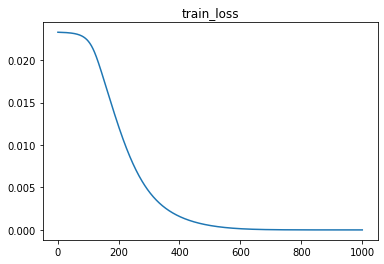

In [ ]:
import matplotlib.pyplot as plt

plt.plot([i+1 for i in range(1000)],model_resulrs["train_loss"])
plt.title("train_loss")
plt.show()

In [ ]:
x_hat=model(y)

In [ ]:
x_hat=x_hat.detach().numpy()

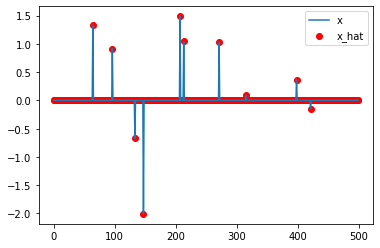

In [ ]:
plt.plot([i for i in range(n)],x)
plt.scatter([i for i in range(n)], x_hat,color='r')
plt.legend(["x", "x_hat"])
plt.show()